## Preprocessing

In [113]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [114]:
# Drop the non-beneficial ID column, 'EIN'
application_df = application_df.drop(columns = ['EIN'])

In [115]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [116]:
# Look at APPLICATION_TYPE value counts for binning
app_type_ct = application_df['NAME'].value_counts()
app_type_ct

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [117]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_ct[app_type_ct <10].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

In [118]:
# Look at CLASSIFICATION value counts for binning
class_binning = application_df['CLASSIFICATION'].value_counts()
class_binning

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [119]:
# You may find it helpful to look at CLASSIFICATION value counts >1
countsclassification = class_binning[class_binning>1]
countsclassification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [120]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_binning[class_binning<100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [121]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype = float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [122]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [123]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [124]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
hidden_nodes1=7
hidden_nodes2=14
hidden_nodes3=21

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 7)                 1967      
                                                                 
 dense_37 (Dense)            (None, 14)                112       
                                                                 
 dense_38 (Dense)            (None, 21)                315       
                                                                 
 dense_39 (Dense)            (None, 1)                 22        
                                                                 
Total params: 2,416
Trainable params: 2,416
Non-trainable params: 0
_________________________________________________________________


In [125]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [126]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 4s 785us/step - loss: 0.5290 - accuracy: 0.7403
Epoch 2/200
804/804 [==============================] - 1s 751us/step - loss: 0.4599 - accuracy: 0.7767
Epoch 3/200
804/804 [==============================] - 1s 754us/step - loss: 0.4510 - accuracy: 0.7809
Epoch 4/200
804/804 [==============================] - 1s 753us/step - loss: 0.4456 - accuracy: 0.7822
Epoch 5/200
804/804 [==============================] - 1s 754us/step - loss: 0.4434 - accuracy: 0.7844
Epoch 6/200
804/804 [==============================] - 1s 766us/step - loss: 0.4408 - accuracy: 0.7846
Epoch 7/200
804/804 [==============================] - 1s 761us/step - loss: 0.4395 - accuracy: 0.7870
Epoch 8/200
804/804 [==============================] - 1s 761us/step - loss: 0.4381 - accuracy: 0.7864
Epoch 9/200
804/804 [==============================] - 1s 755us/step - loss: 0.4373 - accuracy: 0.7863
Epoch 10/200
804/804 [==============================] - 1s 760us/step - l

804/804 [==============================] - 1s 750us/step - loss: 0.4208 - accuracy: 0.7954
Epoch 158/200
804/804 [==============================] - 1s 781us/step - loss: 0.4198 - accuracy: 0.7968
Epoch 159/200
804/804 [==============================] - 1s 753us/step - loss: 0.4207 - accuracy: 0.7961
Epoch 160/200
804/804 [==============================] - 1s 743us/step - loss: 0.4204 - accuracy: 0.7955
Epoch 161/200
804/804 [==============================] - 1s 741us/step - loss: 0.4203 - accuracy: 0.7953
Epoch 162/200
804/804 [==============================] - 1s 749us/step - loss: 0.4205 - accuracy: 0.7963
Epoch 163/200
804/804 [==============================] - 1s 776us/step - loss: 0.4204 - accuracy: 0.7958
Epoch 164/200
804/804 [==============================] - 1s 746us/step - loss: 0.4201 - accuracy: 0.7970
Epoch 165/200
804/804 [==============================] - 1s 749us/step - loss: 0.4202 - accuracy: 0.7961
Epoch 166/200
804/804 [==============================] - 1s 746us/ste

In [127]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 3s - loss: 0.4680 - accuracy: 0.7801 - 3s/epoch - 10ms/step
Loss: 0.4679528474807739, Accuracy: 0.7800583243370056


In [128]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization1.h5')

<AxesSubplot:>

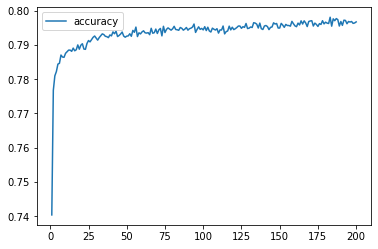

In [129]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')